🔹 Dataset Shape: (920, 16)
🔹 Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

🔹 Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

🔹 First 5 Rows:
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hyper

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

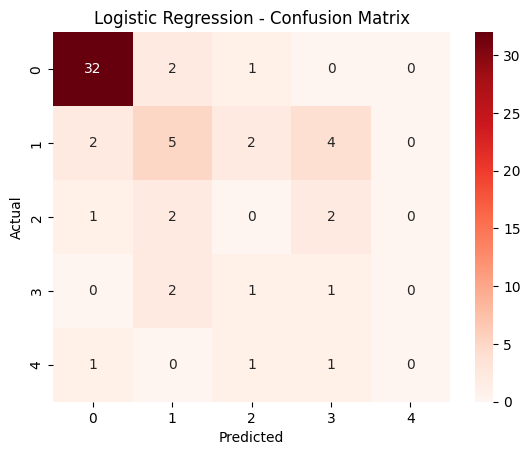

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


🔹 Random Forest Results
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.11      0.08      0.09        13
           2       0.22      0.40      0.29         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.23      0.28      0.25        60
weighted avg       0.52      0.60      0.56        60



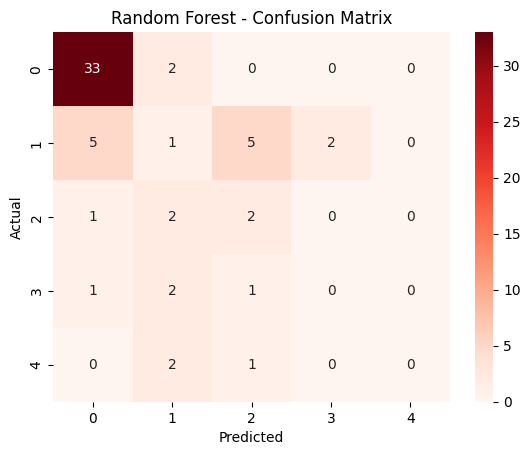

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [13:26:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Results
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.00      0.00      0.00        13
           2       0.17      0.20      0.18         5
           3       0.17      0.25      0.20         4
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.23      0.27      0.25        60
weighted avg       0.50      0.55      0.52        60



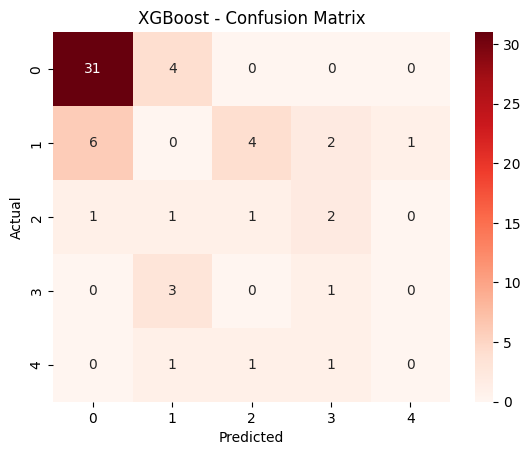


🔹 Feature Importance (Random Forest):
Feature importance calculation is more complex after one-hot encoding.
Consider further steps for detailed analysis of encoded features.


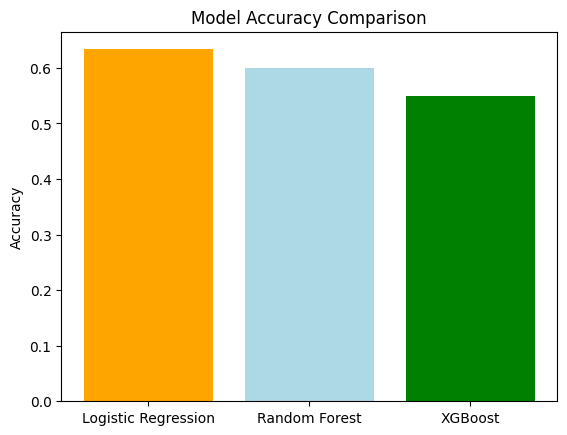


🧠 Ethical Data Handling Guidelines:
-------------------------------------
1. De-identify all patient records (remove names, IDs, contact info).
2. Collect and use data only with proper consent.
3. Ensure compliance with HIPAA/GDPR for data privacy.
4. Maintain fairness — avoid bias toward any age, gender, or ethnicity.
5. Provide transparency so clinicians can interpret model outputs.
6. Do not use the model for diagnosis — only as a clinical decision support tool.



In [2]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("heart_disease_uci.csv")

print("🔹 Dataset Shape:", df.shape)
print("🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Columns:", df.columns.tolist())
print("\n🔹 First 5 Rows:\n", df.head())

# -------------------------------
# 3. Handle Missing Values and Define Features and Target
# -------------------------------
df.dropna(inplace=True)

# Define features and target
X = df.drop("num", axis=1)
y = df["num"]

# Identify categorical and numerical features
categorical_features = ['sex', 'dataset', 'cp', 'restecg', 'exang', 'slope', 'thal']
numerical_features = X.columns.difference(categorical_features + ['id']) 

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# -------------------------------
# 4. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 5. Train Classification Models
# -------------------------------
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = {}

for name, model in models.items():
    # Create a pipeline that first preprocesses the data and then trains the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n==============================")
    print(f"🔹 {name} Results")
    print("==============================")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    results[name] = pipeline.score(X_test, y_test)

# -------------------------------
# 6. Feature Importance (Random Forest)
# -------------------------------
# Get the trained Random Forest model from the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', models["Random Forest"])])
rf_pipeline.fit(X_train, y_train) # Refit the pipeline to access the trained classifier

rf_classifier = rf_pipeline.named_steps['classifier']
# Get feature names after one-hot encoding
# Note: This can be complex, and a simpler approach for visualization might be needed
# For now, we'll skip detailed feature importance visualization due to encoding complexity
print("\n🔹 Feature Importance (Random Forest):")
print("Feature importance calculation is more complex after one-hot encoding.")
print("Consider further steps for detailed analysis of encoded features.")

# -------------------------------
# 7. Model Accuracy Comparison
# -------------------------------
plt.bar(results.keys(), results.values(), color=['orange', 'lightblue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# -------------------------------
# 8. Ethical Data Handling
# -------------------------------
print("""
🧠 Ethical Data Handling Guidelines:
-------------------------------------
1. De-identify all patient records (remove names, IDs, contact info).
2. Collect and use data only with proper consent.
3. Ensure compliance with HIPAA/GDPR for data privacy.
4. Maintain fairness — avoid bias toward any age, gender, or ethnicity.
5. Provide transparency so clinicians can interpret model outputs.
6. Do not use the model for diagnosis — only as a clinical decision support tool.
""")